<a href="https://colab.research.google.com/github/Master349A/capstone_aiml_api/blob/main/notebooks/deep_learning_classification_chest_x_ray_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/data/chest_xray'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h2>Step 1: Importing Libraries</h2>
First we import all the libraries that we will need for our program. This includes: 
<ol>
<li> tensorflow - This is the main backbone of our ML model
<li> keras - It is an high level api of tensorflow that is used to create the NN model
<li> sklearn - This lib provides various tools to evaluate the accuracy of the model we train. 
</ol>

In [ ]:
import tensorflow as tf
import seaborn as sns
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

## import keras

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten 
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.utils.vis_utils import plot_model

## import sklearn 

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
print(tf.__version__)
print(keras.__version__)
print(pd.__version__)
!python --version

2.8.2
2.8.0
Python 3.7.13


**Training Data** <br>
Here we generate the training data that will be used to train our NN model. We import the dataset and perform augmentation by shearing, rescaling and flipping. This will increase the training space and make it more diverse leading to better accuracy. 

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
train = train_datagen.flow_from_directory("/content/drive/MyDrive/data/chest_xray/train",
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 5216 images belonging to 2 classes.


We do the same for validation data. Validation data is used during training to check the accuracy of model on data outside the training set. This helps the model to avoid overfitting or underfitting on the training dataset.

In [ ]:
val_datagen = ImageDataGenerator(rescale = 1./255)
val = val_datagen.flow_from_directory("/content/drive/MyDrive/data/chest_xray/val",
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 16 images belonging to 2 classes.


**Testing Data**

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test = test_datagen.flow_from_directory("/content/drive/MyDrive/data/chest_xray/test",
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 624 images belonging to 2 classes.


<h2>ML Model</h2>
Next we define the NN model and train it on training dataset.
<br> 
The model consists of 4 sets of convolution layes with ReLu activation function and MaxPooling layer. 
The last convolutional layer is followed by a dense layer with ReLu activation function.
For the last layer, we have one neuron with sigmoid activation funtion. We are using adam optimizer for optimization and binary cross entropy as loss function.



In [ ]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(train,validation_data = val, epochs = 20)

PATH = '/content/drive/MyDrive/data/api1'
model.save(PATH)

Epoch 1/20
163/163 [==============================] - 473s 3s/step - loss: 0.4161 - accuracy: 0.8083 - val_loss: 0.3052 - val_accuracy: 0.8125
Epoch 2/20
163/163 [==============================] - 72s 444ms/step - loss: 0.2361 - accuracy: 0.9016 - val_loss: 0.0536 - val_accuracy: 1.0000
Epoch 3/20
163/163 [==============================] - 71s 435ms/step - loss: 0.2128 - accuracy: 0.9155 - val_loss: 0.0479 - val_accuracy: 1.0000
Epoch 4/20
163/163 [==============================] - 72s 444ms/step - loss: 0.1909 - accuracy: 0.9247 - val_loss: 0.0965 - val_accuracy: 1.0000
Epoch 5/20
163/163 [==============================] - 72s 438ms/step - loss: 0.1511 - accuracy: 0.9417 - val_loss: 0.0741 - val_accuracy: 1.0000
Epoch 6/20
163/163 [==============================] - 72s 439ms/step - loss: 0.1492 - accuracy: 0.9415 - val_loss: 0.0465 - val_accuracy: 1.0000
Epoch 7/20
163/163 [==============================] - 71s 438ms/step - loss: 0.1450 - accuracy: 0.9457 - val_loss: 0.0508 - val_accu

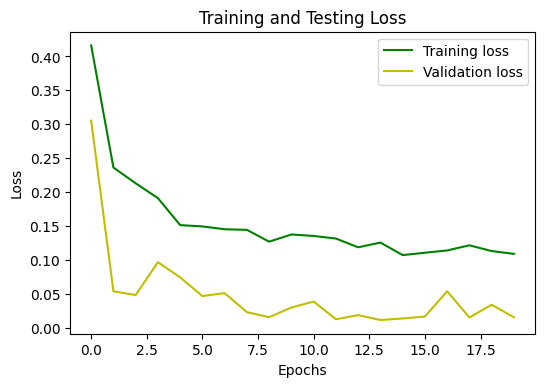

In [ ]:
## plot loss for train and test

loss_train = history.history['loss']
loss_val = history.history['val_loss']
plt.figure(figsize=(6,4), dpi=100)
plt.plot(loss_train, 'g', label = 'Training loss')
plt.plot(loss_val, 'y', label = 'Validation loss')
plt.title("Training and Testing Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

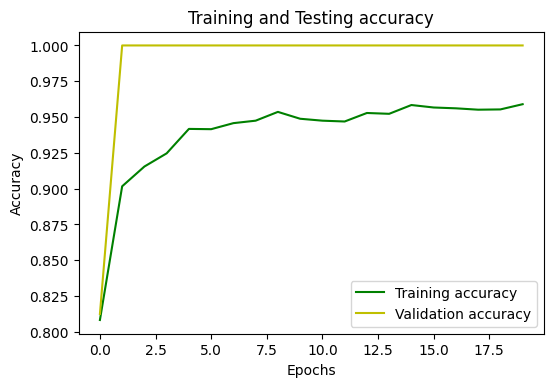

In [ ]:
## plot loss for train and test

loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
plt.figure(figsize=(6,4), dpi=100)
plt.plot( loss_train, 'g', label = 'Training accuracy')
plt.plot( loss_val, 'y', label = 'Validation accuracy')
plt.title("Training and Testing accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
results = model.evaluate(test)
print("test loss, test acc:", results)

NameError: ignored

In [ ]:
PATH = '/content/drive/MyDrive/data/api1'
model.save(PATH)

In [ ]:
PATH = '/content/drive/MyDrive/data/api1'
cnn = keras.models.load_model(PATH)
print(cnn.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 6, 6, 64)        

In [ ]:
results = cnn.evaluate(test)
print("test loss, test acc:", results)

20/20 [==============================] - 67s 3s/step - loss: 0.2728 - accuracy: 0.9103
test loss, test acc: [0.2727903425693512, 0.9102563858032227]


AttributeError: ignored